In [1]:
# For data processing
import numpy as np
from math import sqrt
# For data processing and manipulation
import pandas as pd
import csv
 
# For date calculations
import datetime
import time
 
# For ploting data
import IPython
import IPython.display
 
import itertools
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# For checking path
import os , gc
from os import path
import csv
import json
from IPython.display import clear_output 
 
from scipy.stats import hmean
 
from sklearn.metrics import mean_squared_error
import requests

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [3]:
DATABASE_URL = "http://127.0.0.1:5000/"

In [4]:
ROOTPATH = 'C:\\Study\\CSE 4000\\New folder\\Thesis\\'
#PATH_IMAGE = ROOTPATH+'images_chicago\\'
#PATH_DA = ROOTPATH+"dataset\\chicago_data_sf_2004_2017_for_da.csv"
#PATH_PDA = ROOTPATH+"dataset\\chicago_data_sf_2004_2017_for_police_da.csv"

In [4]:
requestData = {
 'Category': 'VANDALISM'}
#requestData = json.dump(requestData)

urlTest = DATABASE_URL + "query/find/SF/crime"
x = requests.get(urlTest, json=requestData)
print(len(x.json()))


114718


```py
#Finding number of unique years
num_year = dataset_df['Year].unique()
print("Num Year :",num_year)
```

In [9]:
requestData = {
 'field': 'Incident Code'}

urlTest = DATABASE_URL + "/query/unique/SF/crime"
x = requests.get(urlTest, json=requestData)
num_year = x.json()
#print(num_year)
print("Num Year :" , len(num_year))

Num Year : 929


```py 
#Finding uniuqe classes"
classes = dataset_df['Category'].drop_duplicates().sort_values(ascending = True).values
print("Unique classes = \n",classes)

num_classes = classes.shape[0]
print("Number of cateories = ",num_classes)
```

In [10]:
requestData = {
 'field': 'primary_type'}

urlTest = DATABASE_URL + "/query/unique/SF/crime"
x = requests.get(urlTest, json=requestData)
classes = x.json()
print("Unique classes = \n",classes)
print("Number of cateories = ",len(classes))

Unique classes = 
 []
Number of cateories =  0


```py
# Finding unique police department district name 
Police_dept_name = dataset_df['PdDistrict'].drop_duplicates()
# Number of police department
num_police_dept = len(Police_dept_name)
print("Number of Police Department = ",num_police_dept)
print("Police Departments Name -> \n",Police_dept_name)
```

In [8]:
requestData = {
 'field': 'district'}

urlTest = DATABASE_URL + "/query/unique/SF/crime"
x = requests.get(urlTest, json=requestData)
Police_dept_name = x.json()
num_police_dept = len(Police_dept_name)
print("Number of Police Department = ",num_police_dept)
print("Police Departments Name -> \n",Police_dept_name)

Number of Police Department =  0
Police Departments Name -> 
 []


## Finding crimes per district

In [ ]:
pdXCount = {}
for police_dept_now in Police_dept_name:
    requestData = {
     'district': police_dept_now}
    urlTest = DATABASE_URL + "/query/find/SF/crime"
    x = requests.get(urlTest, json=requestData)
    data = x.json()
    # print( police_dept_now , " : " , len(data))
    pdXCount[police_dept_now] = len(data)

df = pd.DataFrame.from_dict(pdXCount, orient='index')
print(df.describe())
df.plot(kind='bar', title='Number of Crime in each Police Department', figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel('Police Department', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.show()


#Finding crime per category

                   0
count      37.000000
mean    57554.702703
std     99702.997177
min        14.000000
25%      2840.000000
50%     11450.000000
75%     79087.000000
max    477974.000000


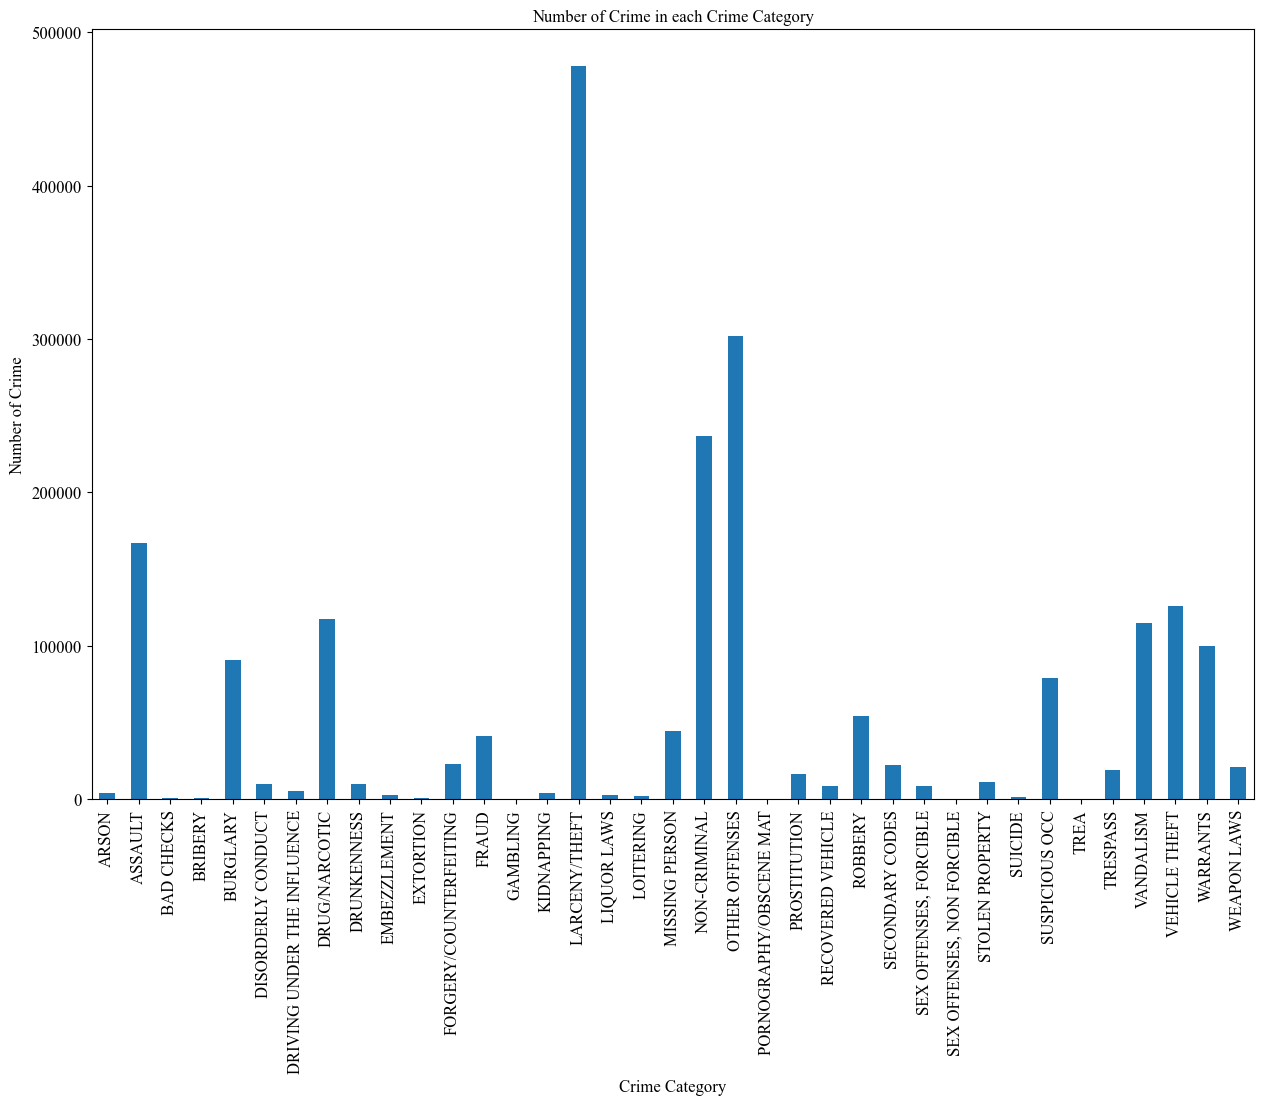

In [ ]:
crimecatXcount = {}
for crimecat_now in classes:
    requestData = {'primary_type':crimecat_now}
    urlTest = DATABASE_URL+ "/query/find/SF/crime"
    x = requests.get(urlTest,json=requestData)
    data = x.json()
    crimecatXcount[crimecat_now] = len(data)
    
df = pd.DataFrame.from_dict(crimecatXcount,orient='index')
print(df.describe())
df.plot(kind = 'bar', title = 'Number of Crime in each Crime Category', figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.show()


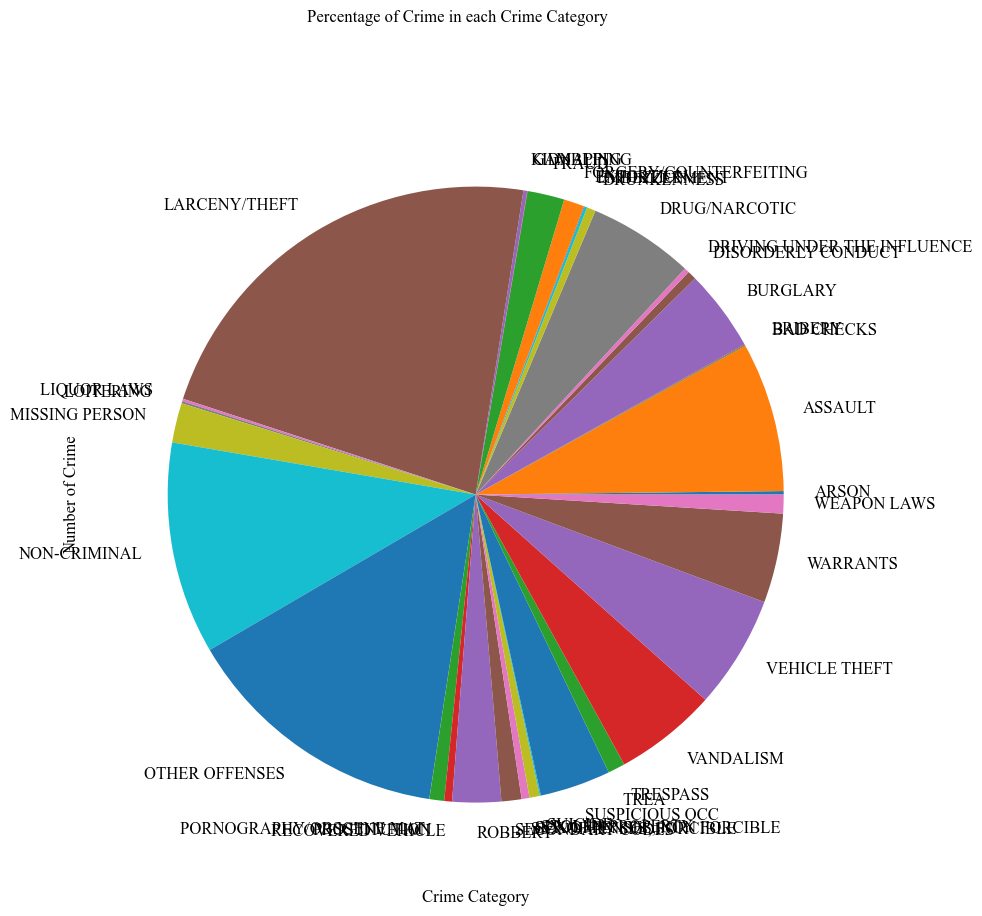

In [ ]:
# percentage pie plot of crime category
df.plot(kind='pie', title='Percentage of Crime in each Crime Category', figsize=(15, 10), legend=False, fontsize=12, subplots=True)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.show()

# crime per year 

                   0
count      16.000000
mean   133095.250000
std     24694.475672
min     45059.000000
25%    131834.750000
50%    136256.000000
75%    145131.250000
max    151459.000000


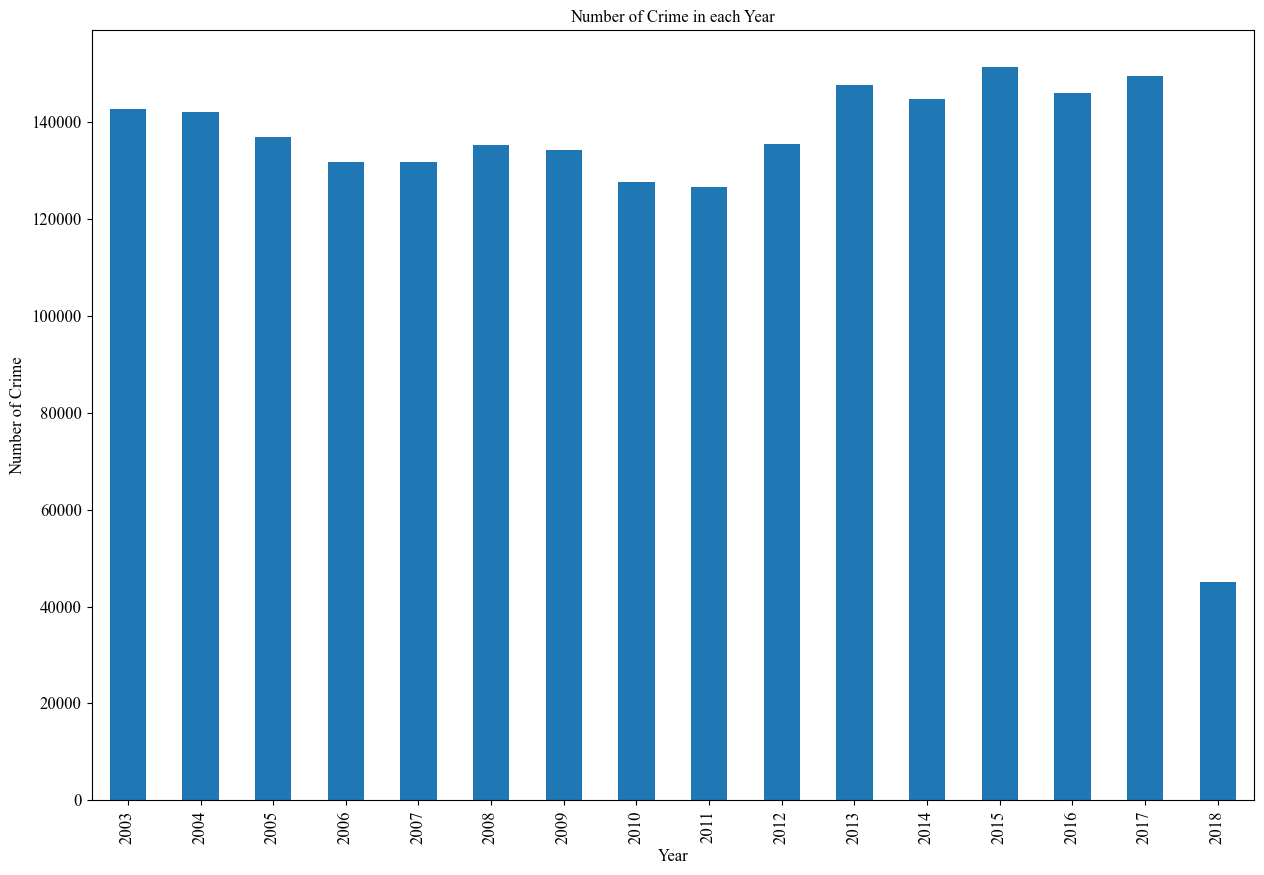

In [ ]:
yearXCount = {}
for year_now in num_year:
    requestData = {
     'year': year_now}
    urlTest = DATABASE_URL + "/query/find/SF/crime"
    x = requests.get(urlTest, json=requestData)
    data = x.json()
    # print( year_now , " : " , len(data))
    yearXCount[year_now] = len(data)

df = pd.DataFrame.from_dict(yearXCount, orient='index')
print(df.describe())
df.plot(kind='bar', title='Number of Crime in each Year', figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.show()

# crime per month


          0
count  12.0
mean    0.0
std     0.0
min     0.0
25%     0.0
50%     0.0
75%     0.0
max     0.0


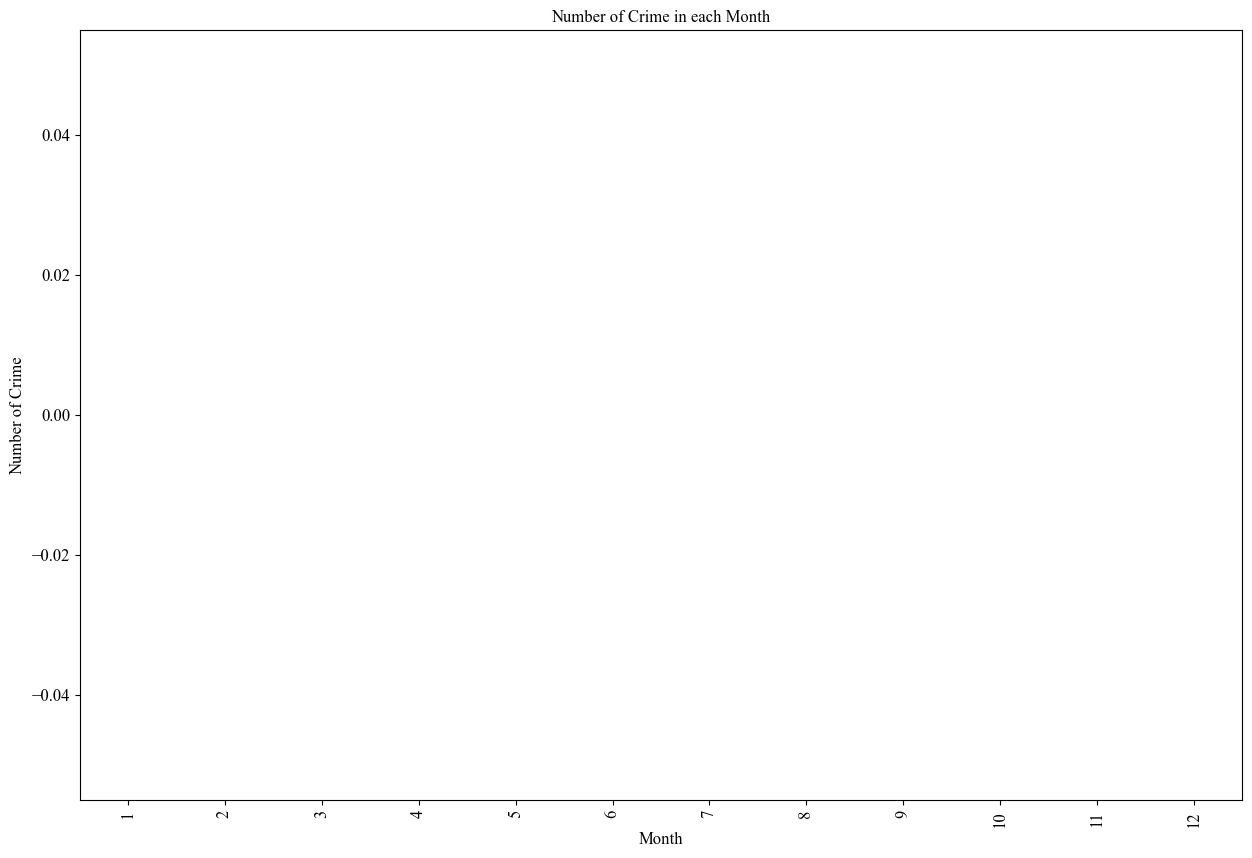

In [10]:
monthXCount = {}
for month_now in range(1,13):
    requestData = {
     'month': month_now}
    urlTest = DATABASE_URL + "/query/find/SF/crime"
    x = requests.get(urlTest, json=requestData)
    data = x.json()
    # print( month_now , " : " , len(data))
    monthXCount[month_now] = len(data)

df = pd.DataFrame.from_dict(monthXCount, orient='index')
print(df.describe())
df.plot(kind='bar', title='Number of Crime in each Month', figsize=(15, 10), legend=False, fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.show()


# per discrict, per year crime count

                  0
count     12.000000
mean    9974.833333
std      596.573219
min     8835.000000
25%     9561.750000
50%    10088.000000
75%    10417.750000
max    10802.000000


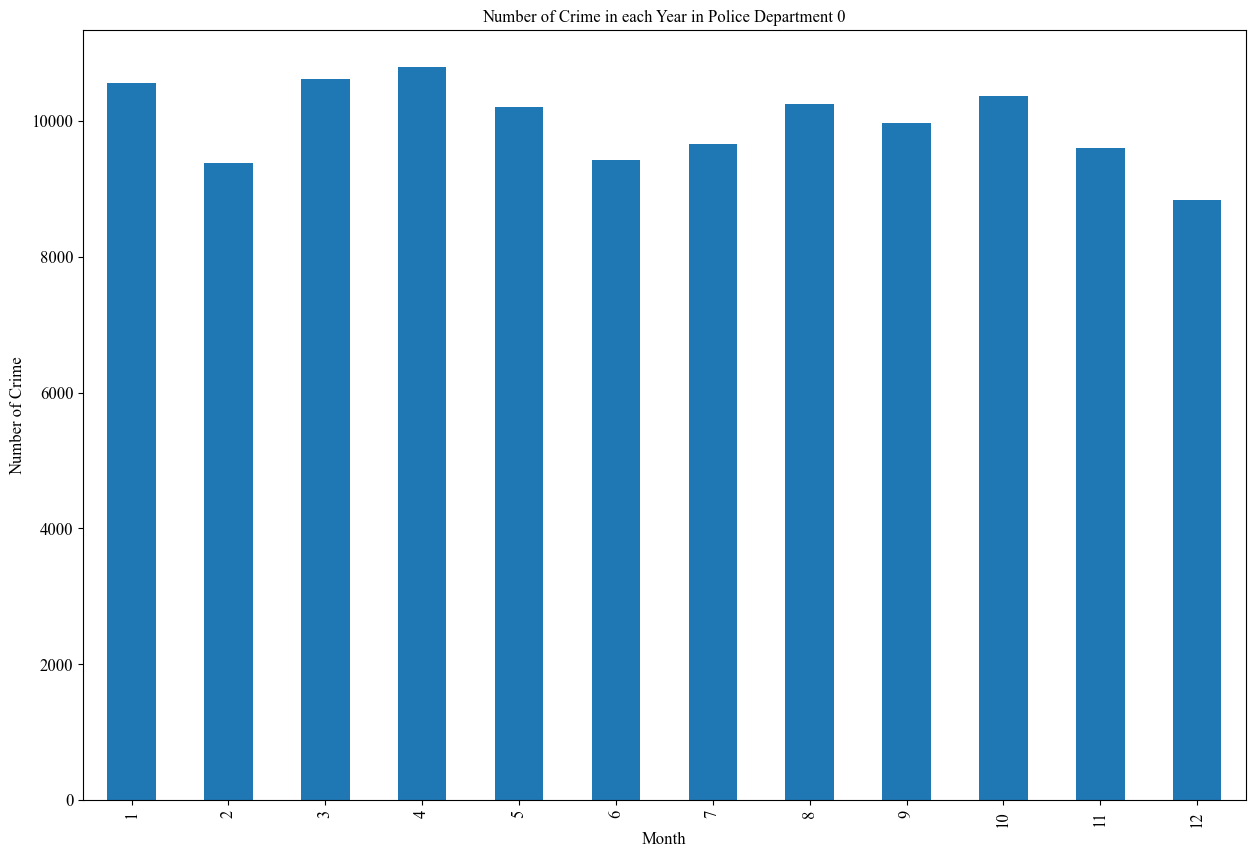

                  0
count     12.000000
mean   22202.916667
std     1032.681457
min    20786.000000
25%    21408.500000
50%    22209.000000
75%    22698.250000
max    24205.000000


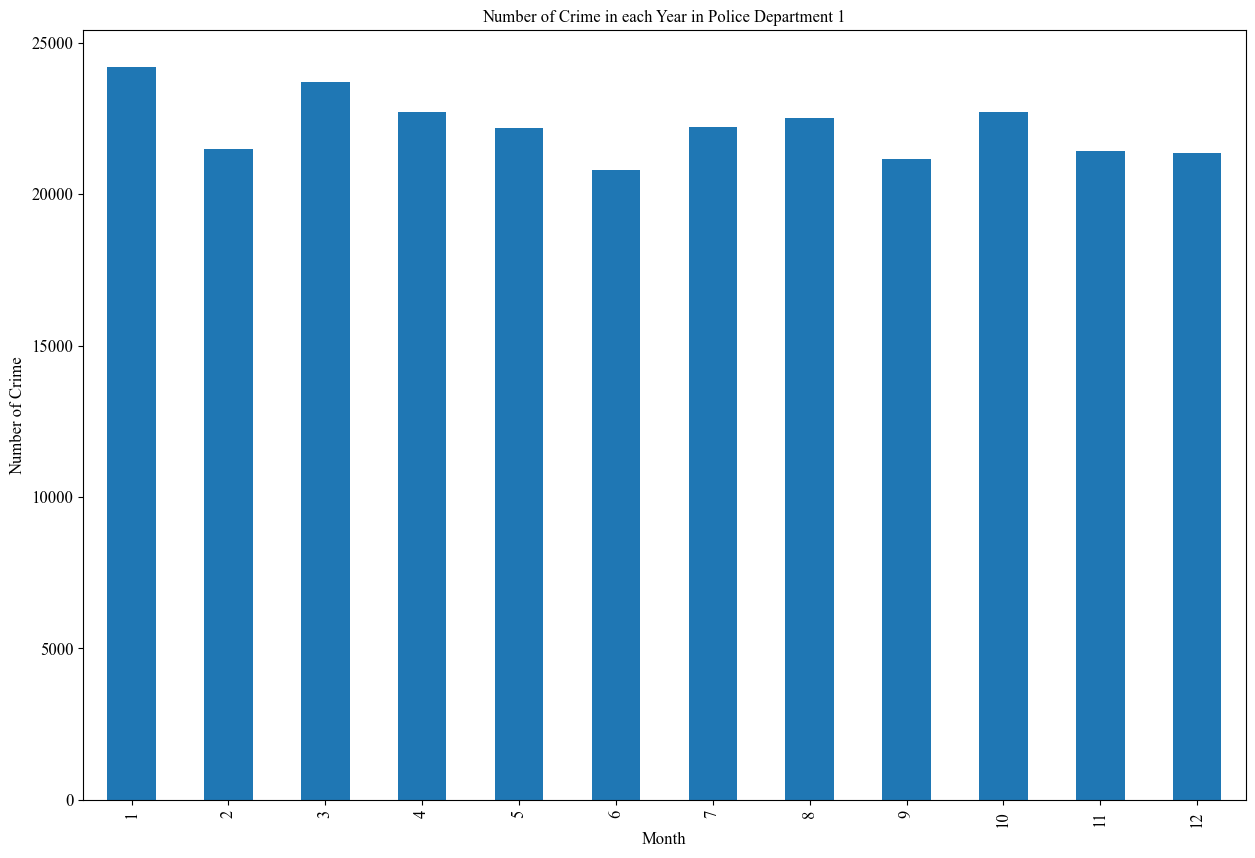

                  0
count     12.000000
mean   24082.083333
std     1245.473291
min    21815.000000
25%    23367.500000
50%    24132.000000
75%    24817.500000
max    26172.000000


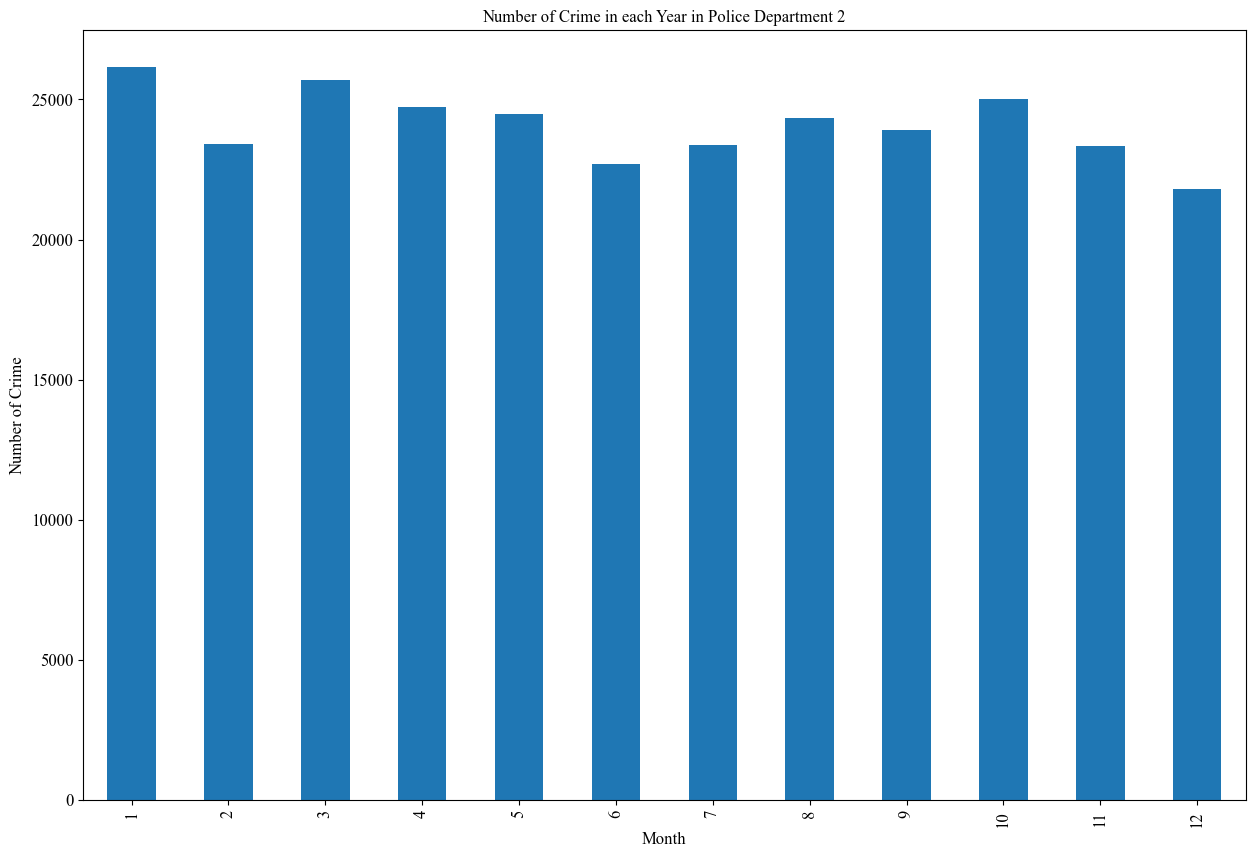

                  0
count     12.000000
mean   32557.666667
std     1517.341894
min    30066.000000
25%    31539.500000
50%    32895.500000
75%    33614.750000
max    34520.000000


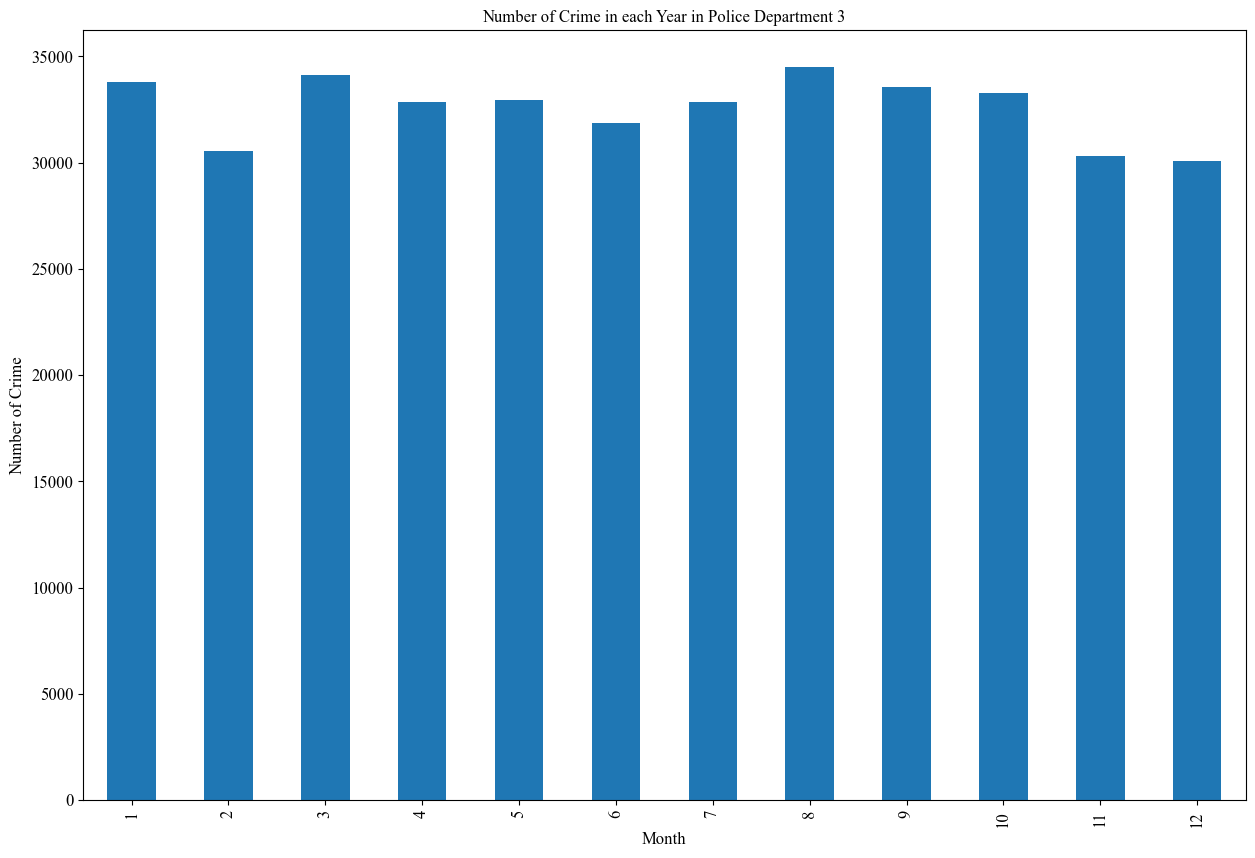

                  0
count     12.000000
mean   12955.083333
std      719.137546
min    12067.000000
25%    12408.500000
50%    12794.500000
75%    13530.750000
max    14022.000000


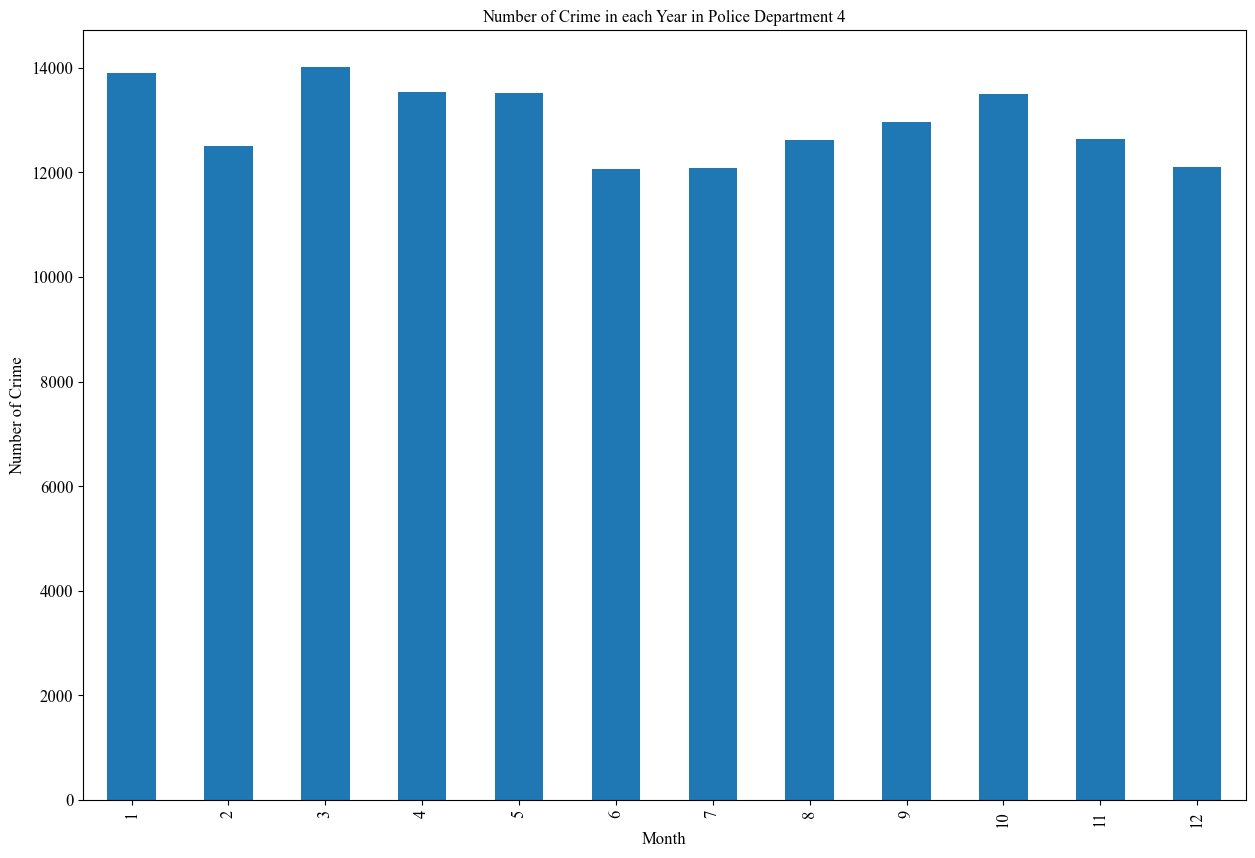

                  0
count     12.000000
mean   15091.000000
std      852.125684
min    13886.000000
25%    14497.500000
50%    15033.000000
75%    15683.500000
max    16628.000000


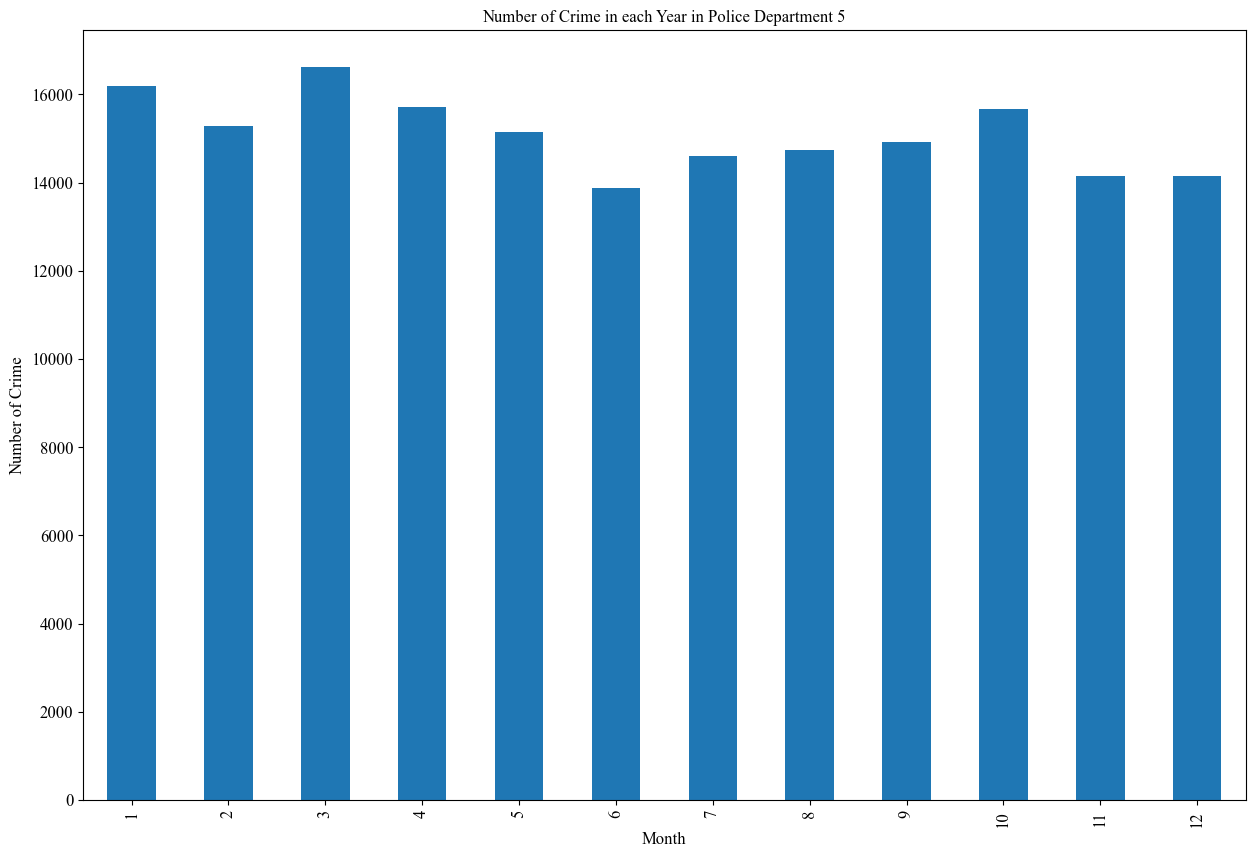

                  0
count     12.000000
mean   17123.333333
std      874.469432
min    15608.000000
25%    16596.000000
50%    17087.000000
75%    17545.000000
max    18645.000000


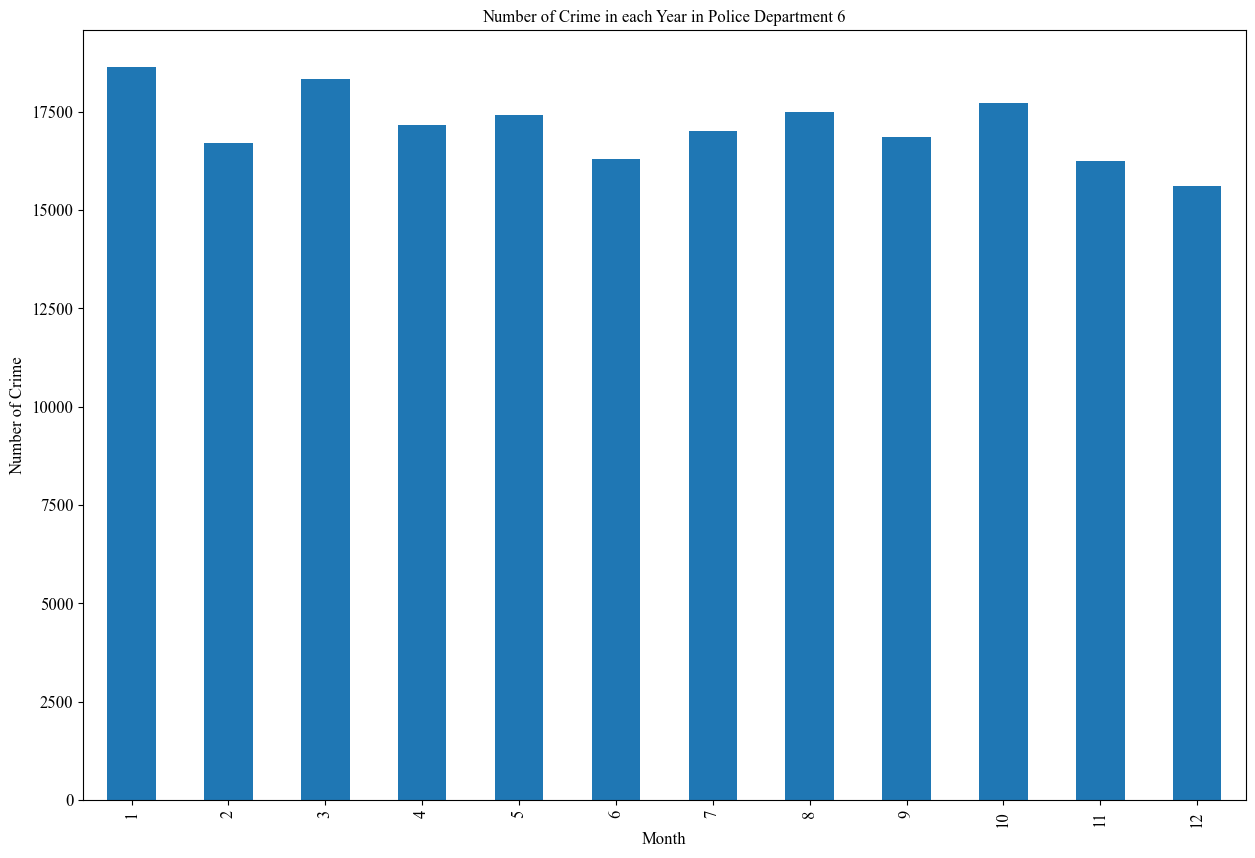

                  0
count     12.000000
mean   15579.500000
std      901.360436
min    14043.000000
25%    15047.750000
50%    15692.000000
75%    16026.250000
max    16958.000000


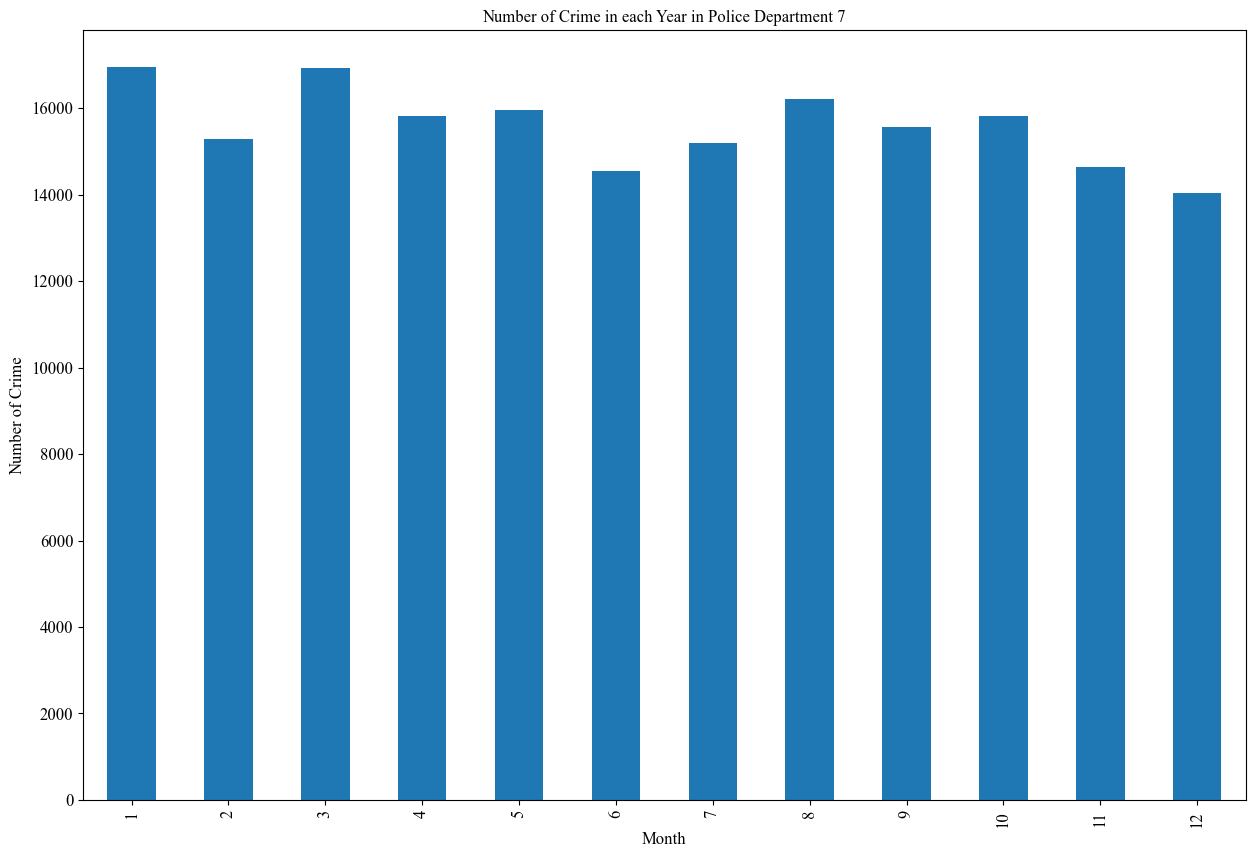

                  0
count     12.000000
mean   18493.583333
std      846.139625
min    17181.000000
25%    17729.000000
50%    18643.500000
75%    19256.500000
max    19504.000000


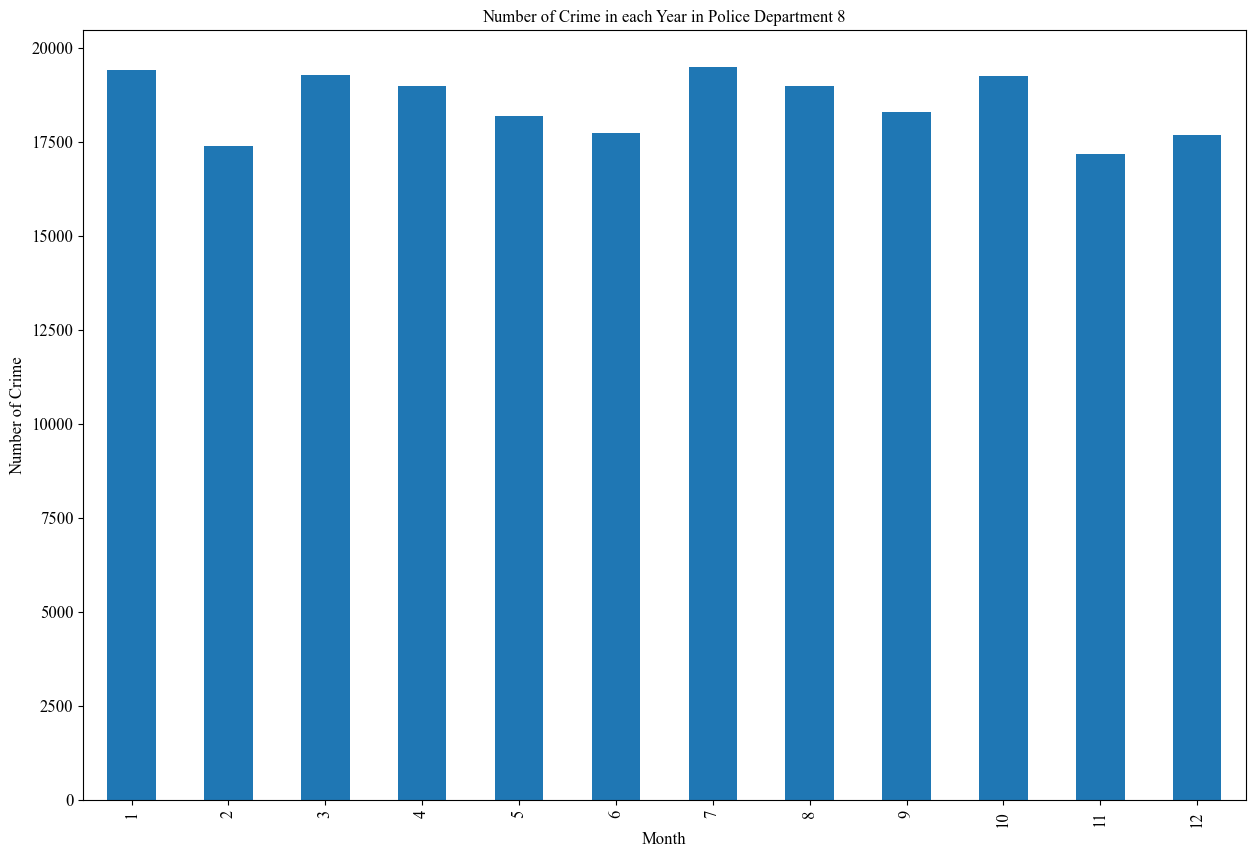

                  0
count     12.000000
mean    9400.333333
std      484.443323
min     8652.000000
25%     9006.500000
50%     9381.000000
75%     9868.500000
max    10093.000000


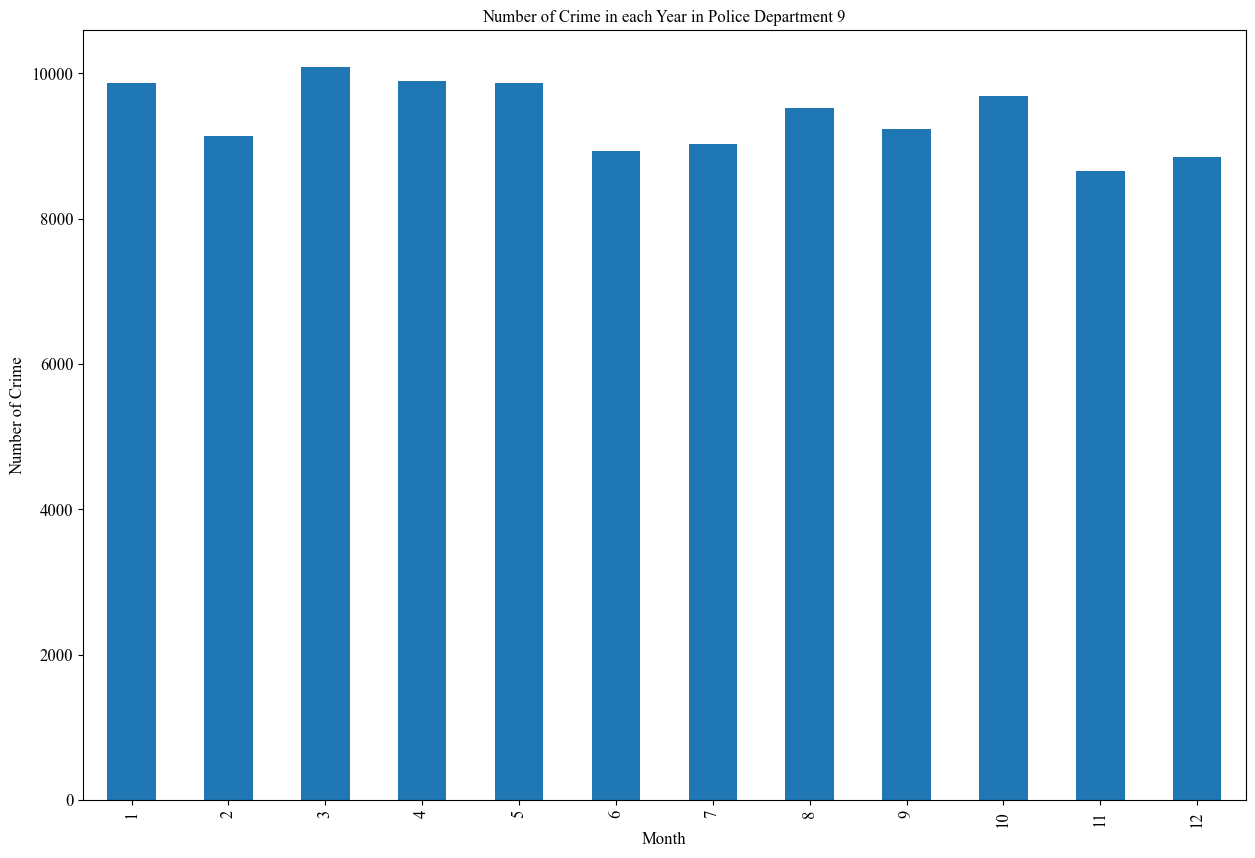

In [ ]:
for police_dept_now in Police_dept_name:
    monthXCount = {}
    for month_now in range(1,13):
        requestData = {
         'month': month_now,
         'district': police_dept_now}
        urlTest = DATABASE_URL + "/query/find/SF/crime"
        x = requests.get(urlTest, json=requestData)
        data = x.json()
        # print( year_now , " : " , len(data))
        monthXCount[month_now] = len(data)
    df = pd.DataFrame.from_dict(monthXCount, orient='index')
    print(df.describe())
    df.plot(kind='bar', title='Number of Crime in each Year in Police Department '+str(police_dept_now), figsize=(15, 10), legend=False, fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Crime', fontsize=12)
    plt.show()


# per discrict, per year crime count


                 0
count    16.000000
mean   7481.125000
std    1598.755678
min    2347.000000
25%    7085.000000
50%    7723.500000
75%    8372.750000
max    9140.000000


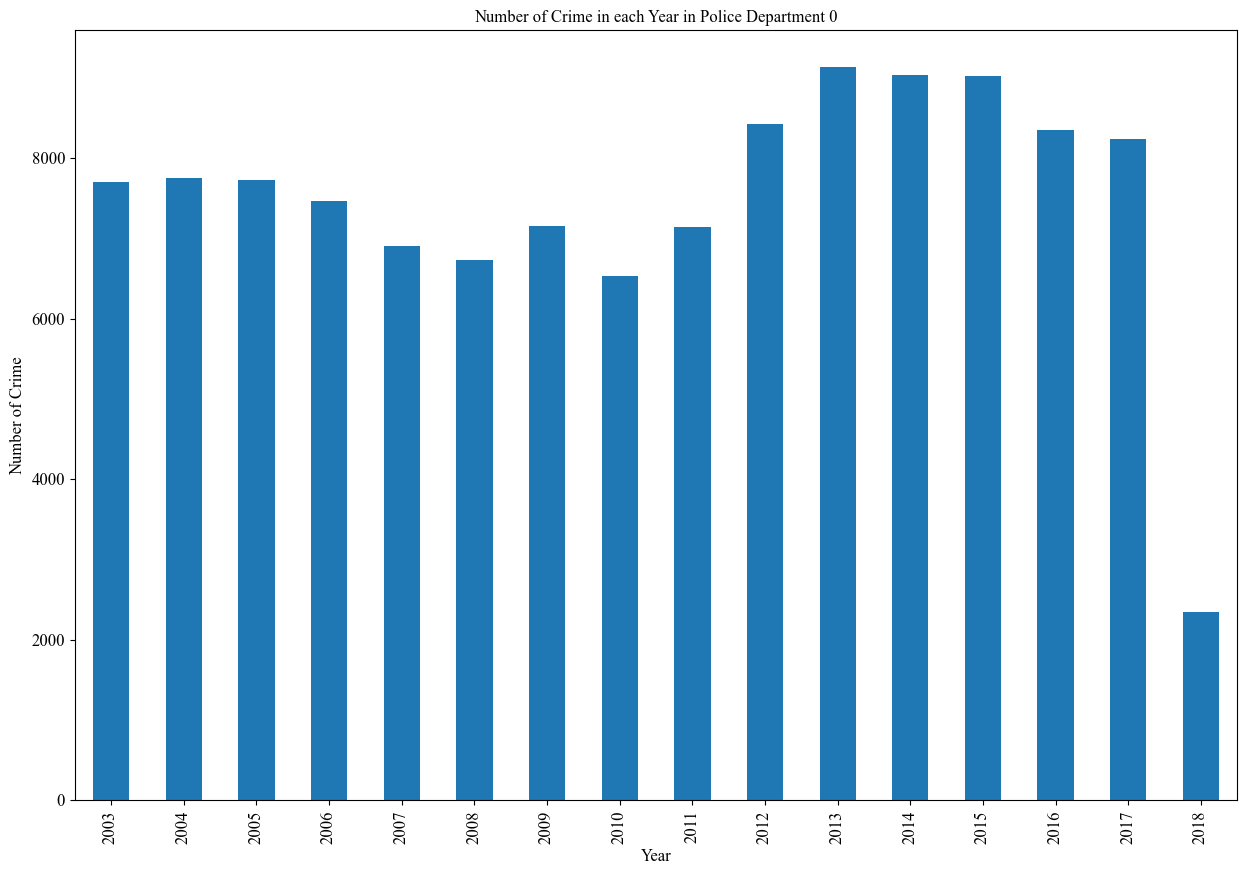

                  0
count     16.000000
mean   16652.187500
std     3440.260615
min     6095.000000
25%    15604.250000
50%    17909.000000
75%    18319.750000
max    20687.000000


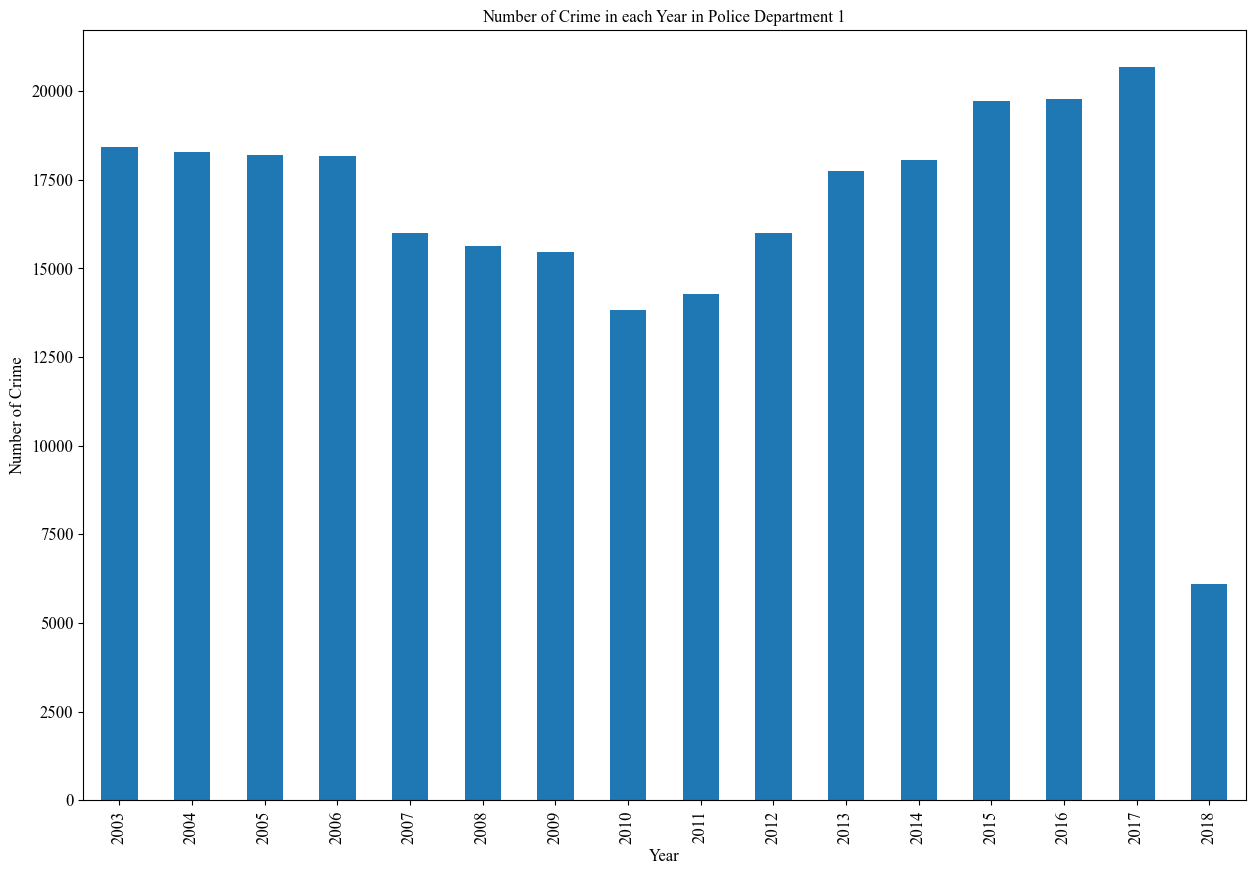

                 0
count     16.00000
mean   18061.56250
std     3334.13477
min     6329.00000
25%    17870.00000
50%    18488.50000
75%    19354.50000
max    21211.00000


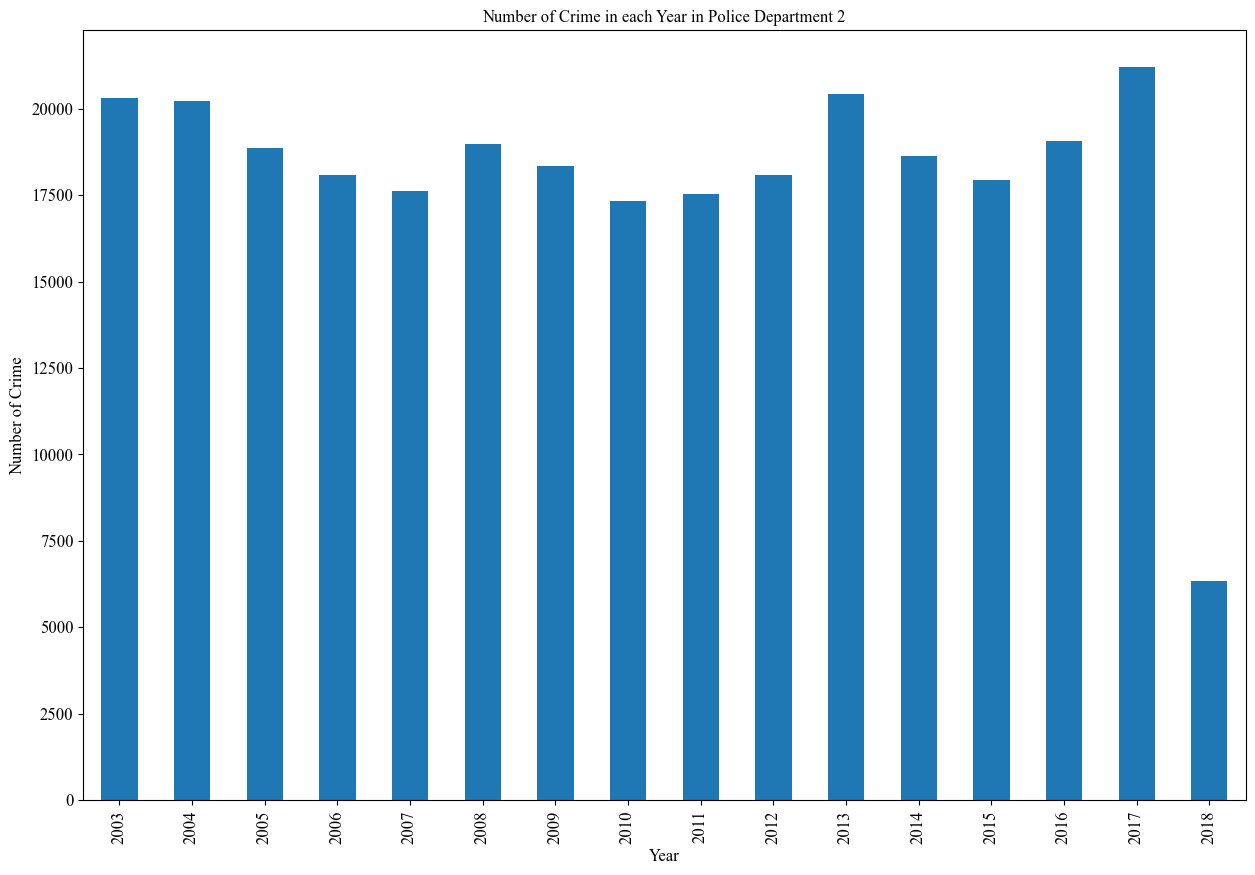

                  0
count     16.000000
mean   24418.250000
std     4801.961245
min     8438.000000
25%    23595.500000
50%    24560.000000
75%    27814.750000
max    29441.000000


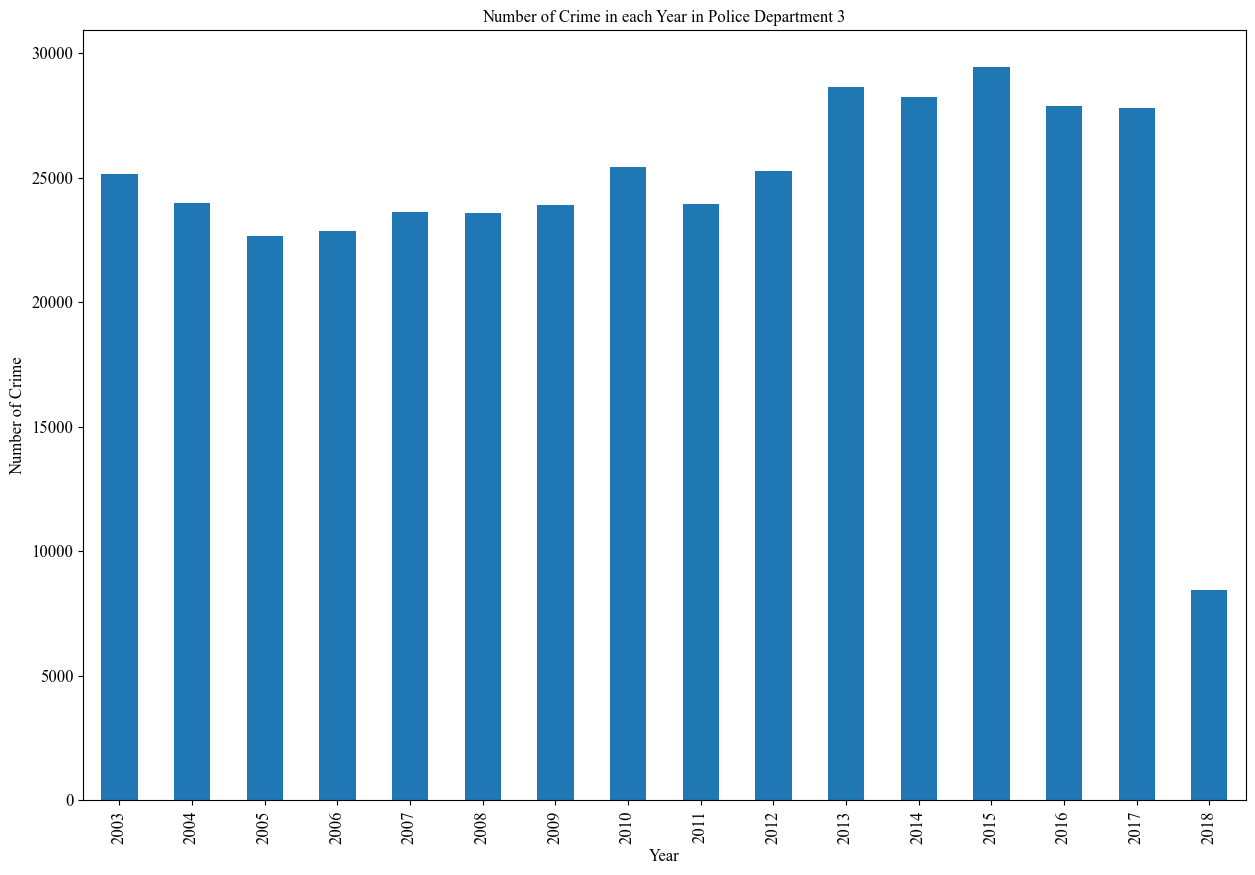

                  0
count     16.000000
mean    9716.312500
std     1899.944551
min     3225.000000
25%     9535.250000
50%     9982.500000
75%    10784.750000
max    11392.000000


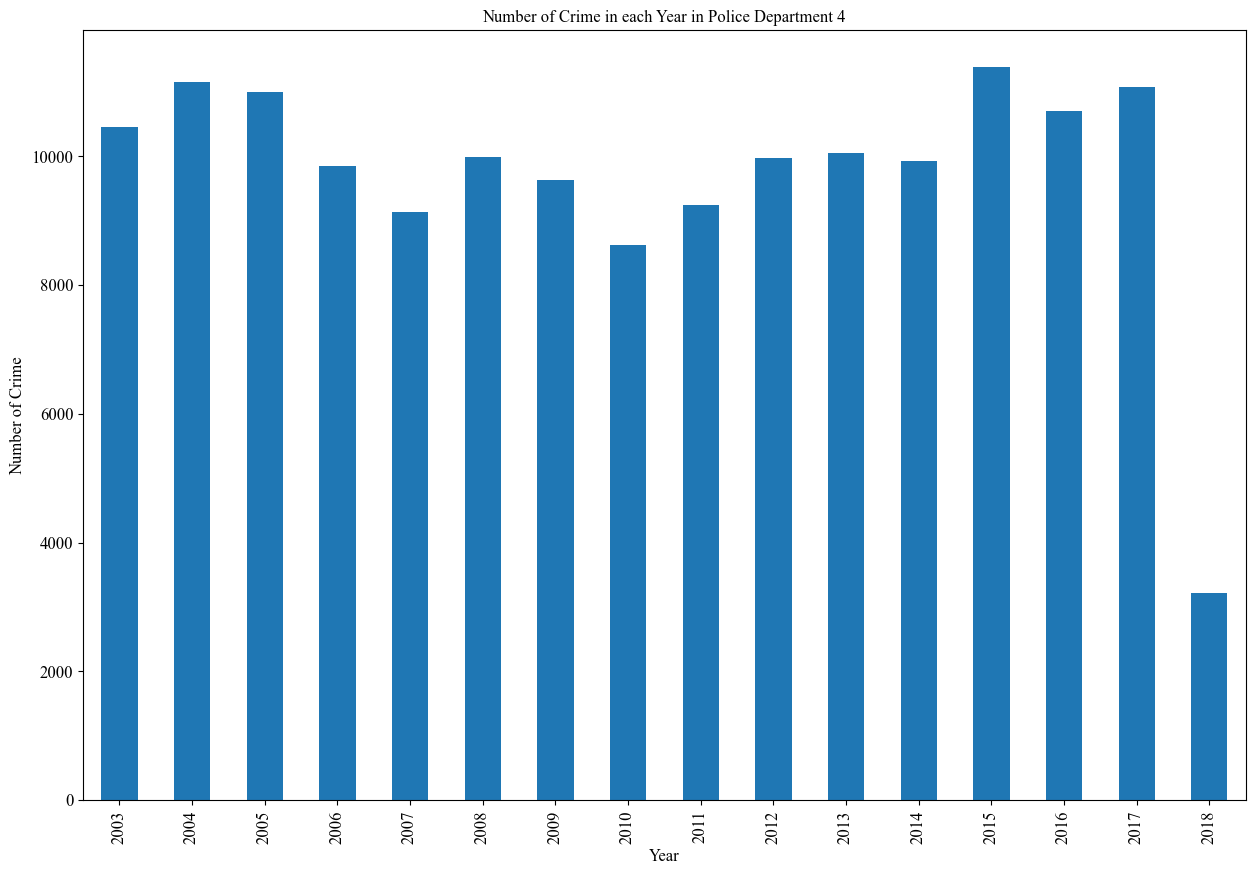

                  0
count     16.000000
mean   11318.250000
std     2187.895229
min     3525.000000
25%    11201.750000
50%    11742.500000
75%    12436.250000
max    12975.000000


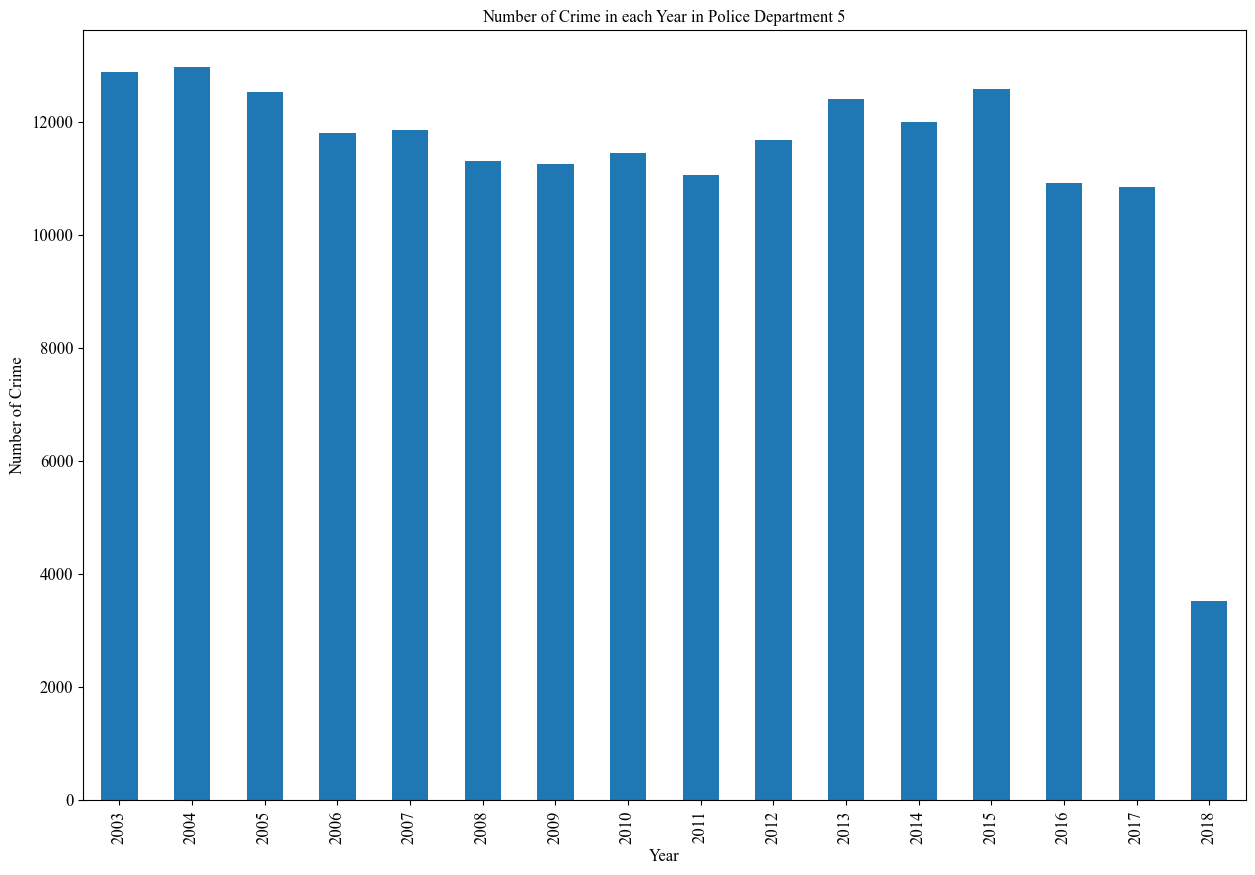

                  0
count     16.000000
mean   12842.500000
std     2488.321067
min     3869.000000
25%    12843.500000
50%    13184.500000
75%    13896.250000
max    14828.000000


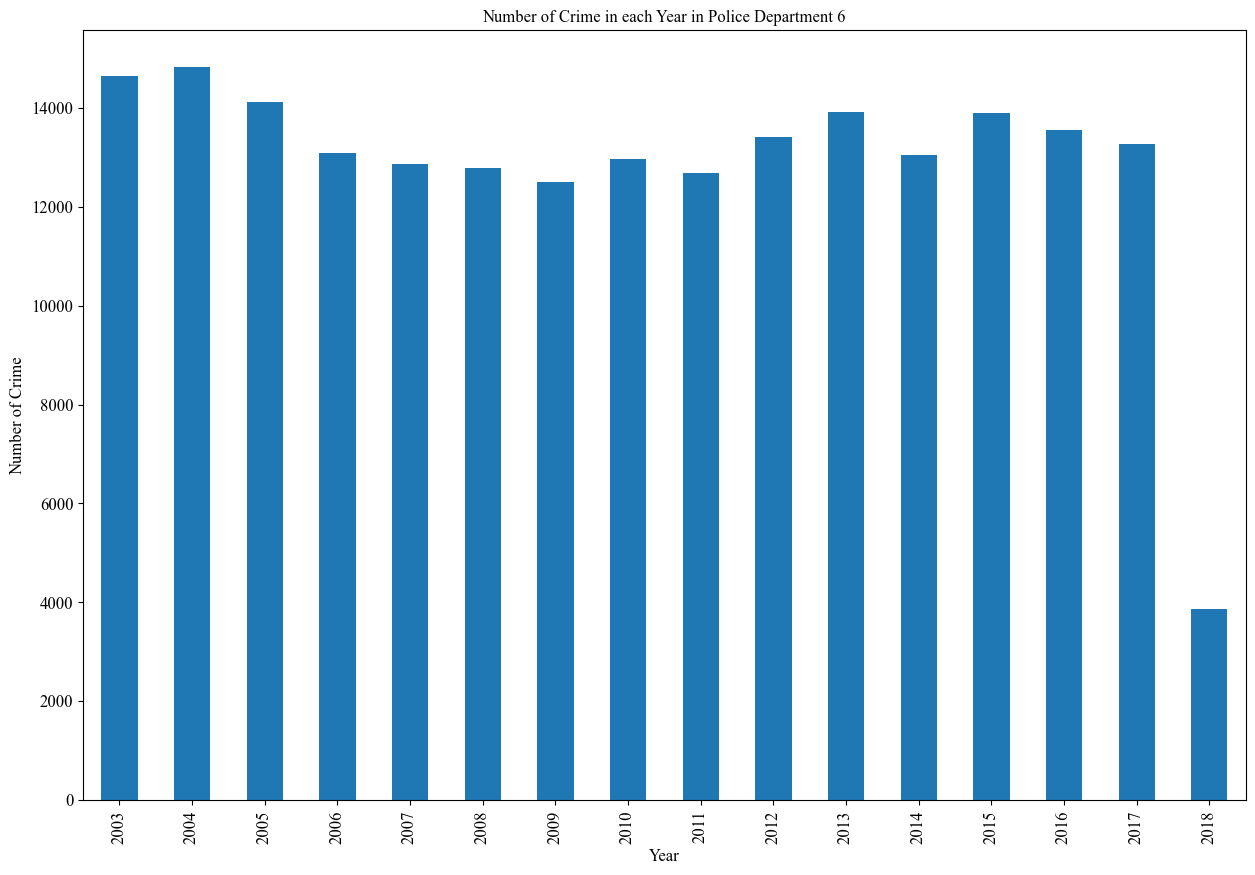

                  0
count     16.000000
mean   11684.625000
std     3187.860429
min     2806.000000
25%    10975.500000
50%    11814.500000
75%    12800.250000
max    16658.000000


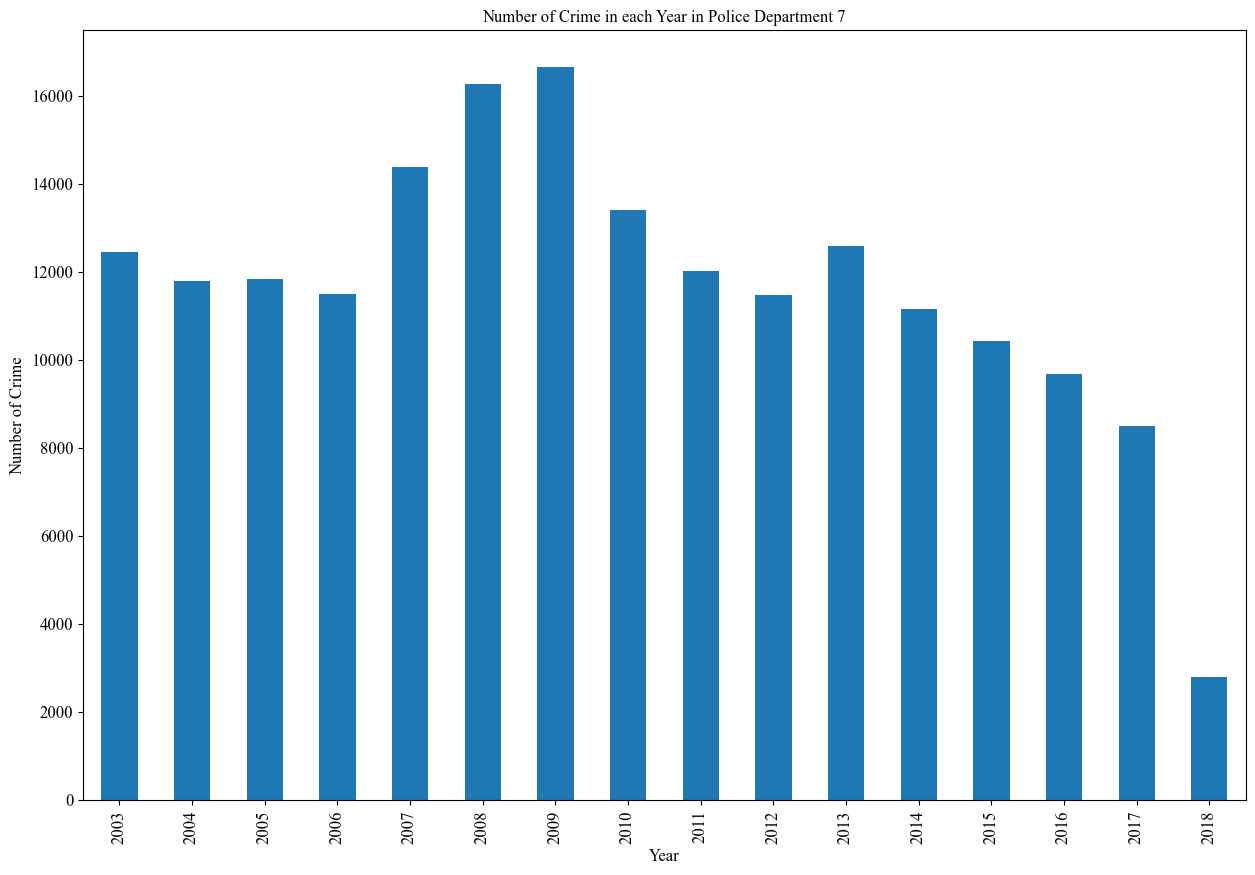

                  0
count     16.000000
mean   13870.187500
std     3010.014911
min     6014.000000
25%    12815.250000
50%    13346.500000
75%    15165.500000
max    18638.000000


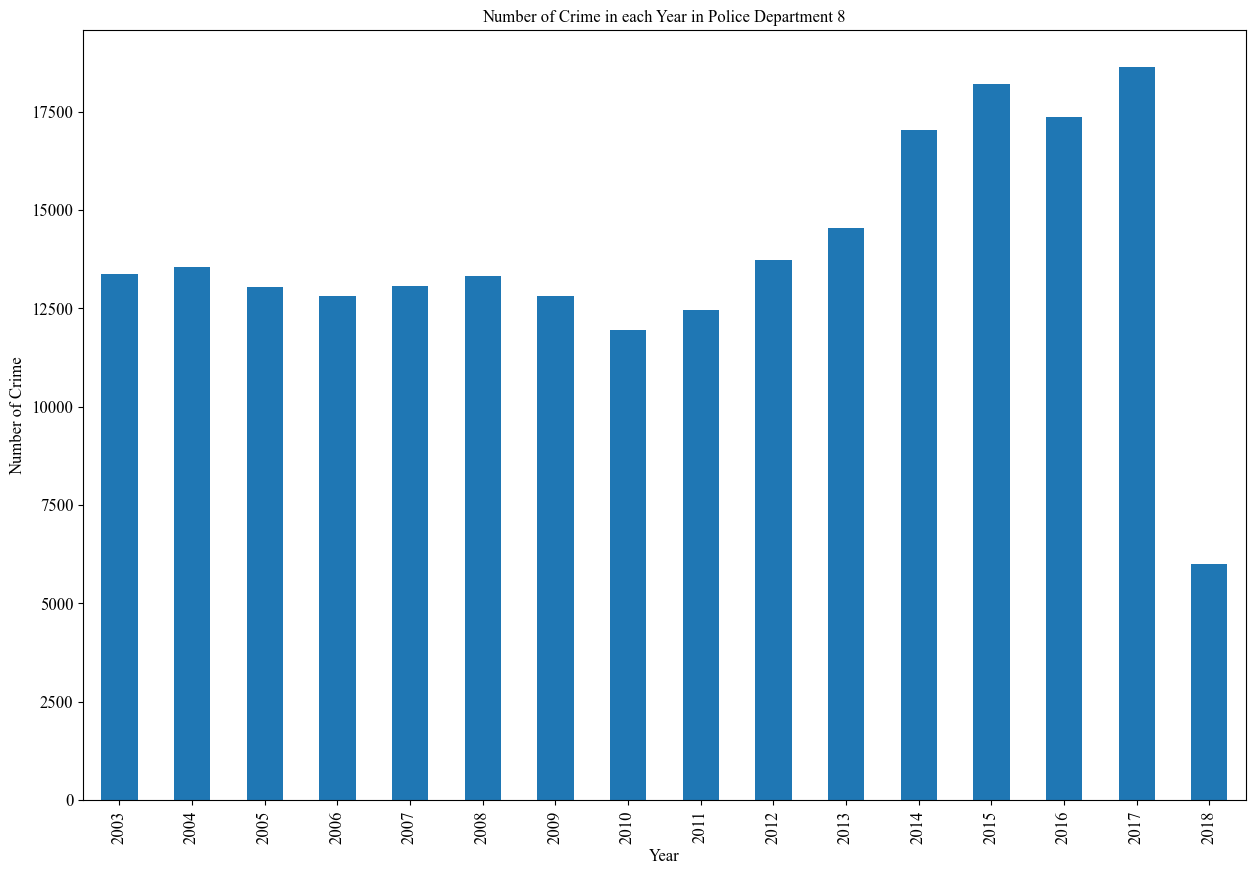

                 0
count    16.000000
mean   7050.250000
std    1574.042757
min    2411.000000
25%    6341.750000
50%    7230.500000
75%    7850.000000
max    9217.000000


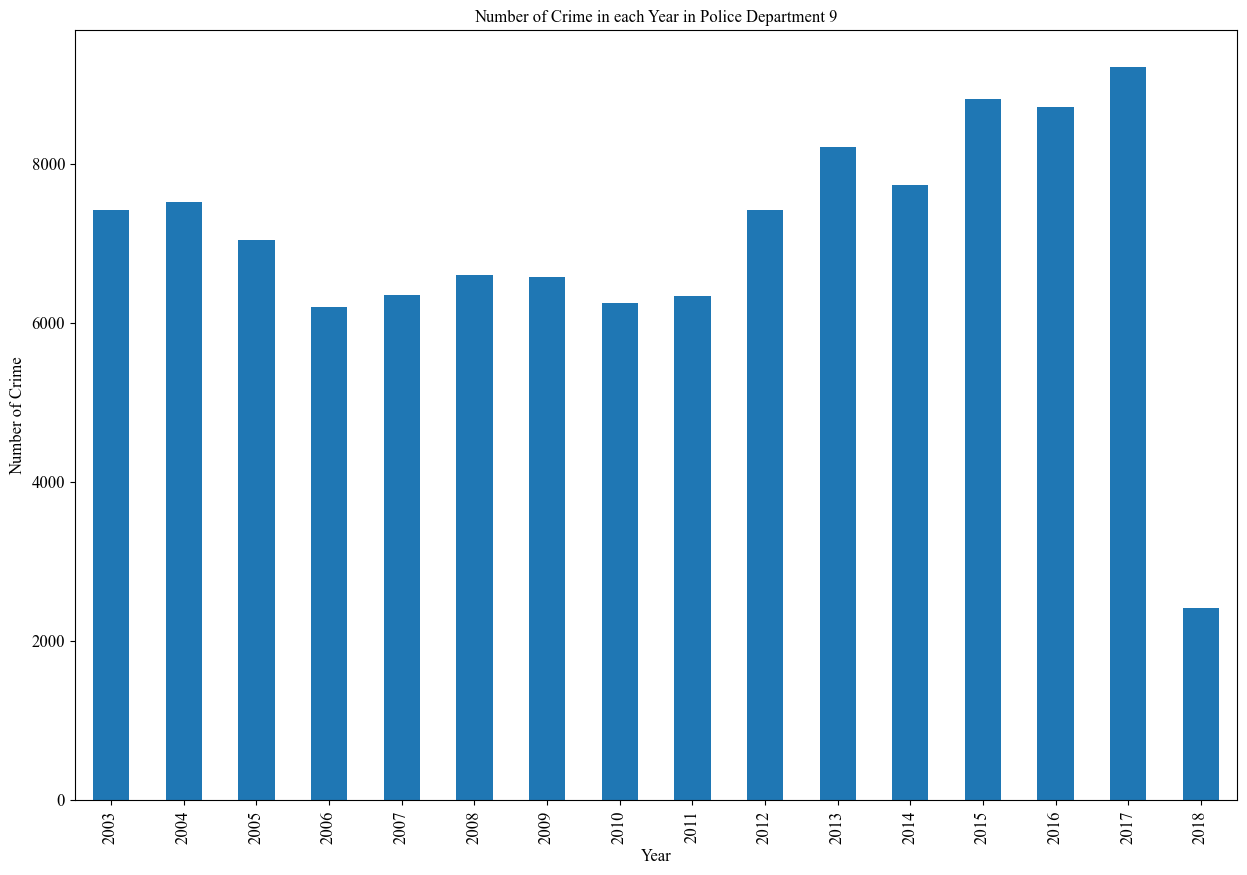

In [ ]:
for police_dept_now in Police_dept_name:
    yearXCount = {}
    for year_now in num_year:
        requestData = {
         'year': year_now,
         'district': police_dept_now}
        urlTest = DATABASE_URL + "/query/find/SF/crime"
        x = requests.get(urlTest, json=requestData)
        data = x.json()
        # print( year_now , " : " , len(data))
        yearXCount[year_now] = len(data)
    df = pd.DataFrame.from_dict(yearXCount, orient='index')
    print(df.describe())
    df.plot(kind='bar', title='Number of Crime in each Year in Police Department '+str(police_dept_now), figsize=(15, 10), legend=False, fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Crime', fontsize=12)
    plt.show()
